C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier 

C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier 

C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier 

Overall Accuracy: 0.96165
Macro F1 Score (Overall): 0.83680
Accepted Accuracy: 0.97499
Macro F1 Score (Accepted): 0.95157


Text(50.722222222222214, 0.5, 'Actual Class')

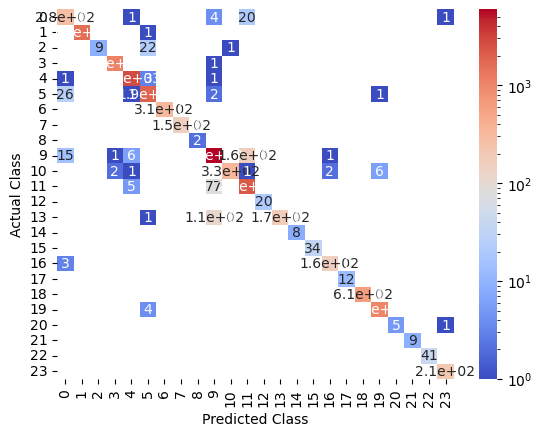

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

seed = 42
test_size = 0.2
confidence_threshold = 0.75 

column_names = [
    "name", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", 
    "IoTIP", "IoTIP_int", "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", 
    "PacketCount", "BytesCount", "reversePacketCount", "reverseBytesCount", "SmallPktCount", 
    "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT", "FirstNonEmptyPktSize", 
    "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount", 
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT", 
    "PktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT", 
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", 
    "NTP", "TCP_others", "UDP_others", "year_month"
]

df = pd.read_csv("sample2.csv", names=column_names)

encoder = LabelEncoder()
df['IoTMac'] = encoder.fit_transform(df['IoTMac'])

y = df['IoTMac']
df = df.drop(['name', 'start_date', 'start_time', 'year_month', 'IoTIP', 'IoTIP_int', 'hostMac', 'IoTMac', 'hostIP', 'hostIP_int'], axis=1)
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model = RandomForestClassifier(max_depth=15, max_features=5, n_estimators=150, random_state=seed)
model.fit(X_train, y_train)

final_predictions = model.predict(X_test)

tree_predictions = np.array([tree.predict(X_test) for tree in model.estimators_])

agreement_matrix = (tree_predictions == final_predictions)
agreement_counts = np.sum(agreement_matrix, axis=0)
agreement_percentages = agreement_counts / len(model.estimators_)


overall_accuracy = accuracy_score(y_test, final_predictions)
overall_f1_score = f1_score(y_test, final_predictions, average='macro')

accepted_indices = agreement_percentages >= confidence_threshold
accepted_predictions = final_predictions[accepted_indices]
accepted_y_test = y_test.values[accepted_indices]


accepted_accuracy = accuracy_score(accepted_y_test, accepted_predictions)
accepted_f1_score = f1_score(accepted_y_test, accepted_predictions, average='macro')

print(f'Overall Accuracy: {overall_accuracy:.5f}')
print(f'Macro F1 Score (Overall): {overall_f1_score:.5f}')
print(f'Accepted Accuracy: {accepted_accuracy:.5f}')
print(f'Macro F1 Score (Accepted): {accepted_f1_score:.5f}')

cmatrix = confusion_matrix(accepted_y_test, accepted_predictions)
import seaborn as sns
from matplotlib.colors import LogNorm
sns_map = sns.heatmap(cmatrix, annot=True, cmap='coolwarm', norm=LogNorm())
sns_map.set_xlabel('Predicted Class')
sns_map.set_ylabel('Actual Class')